[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



a) Political Party
b) Size in acres
c) Number of people who voted for a candidate
d) Weight in Kilograms

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

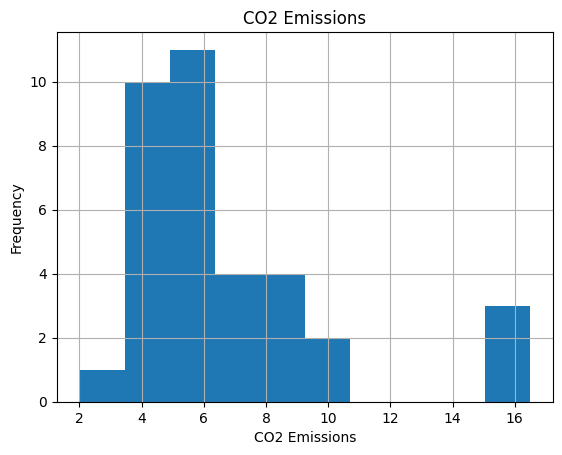

In [3]:
carbon_west['CO2'].hist()
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.title("CO2 Emissions")
plt.show()


Part b. Find the mean, median, and standard deviation.

In [4]:
print("Mean:", carbon_west['CO2'].mean())
print("Median:", carbon_west['CO2'].median())
print("Std. Dev:", carbon_west['CO2'].std())


Mean: 6.717142857142858
Median: 5.9
Std. Dev: 3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [5]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [6]:
murders_no_dc = murders[murders['state'] != 'DC']
print("Mean:", murders_no_dc['murder'].mean())
print("Standard Deviation:", murders_no_dc['murder'].std())


Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [7]:
murders_no_dc.describe()


,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
print("Total Mean:", murders['murder'].mean())
print("Total Median:", murders['murder'].median())
murders['murder'].describe()


Total Mean: 5.252941176470588
Total Median: 5.0


,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [9]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

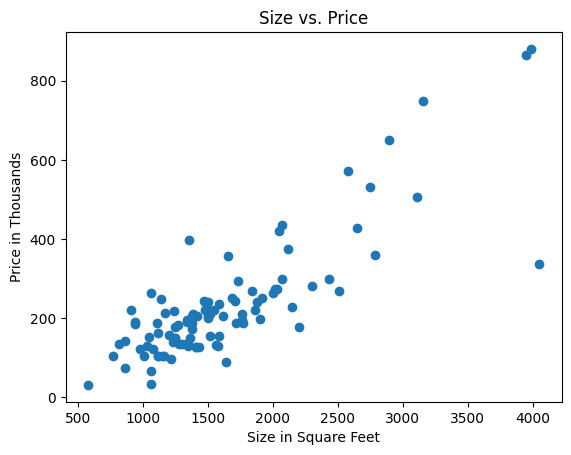

In [17]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel("Size in Square Feet")
plt.ylabel("Price in Thousands")
plt.title("Size vs. Price")
plt.show()


Part b. Find the correlation between the two variables.

In [11]:
print("Correlation:", houses['size'].corr(houses['price']))

Correlation: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

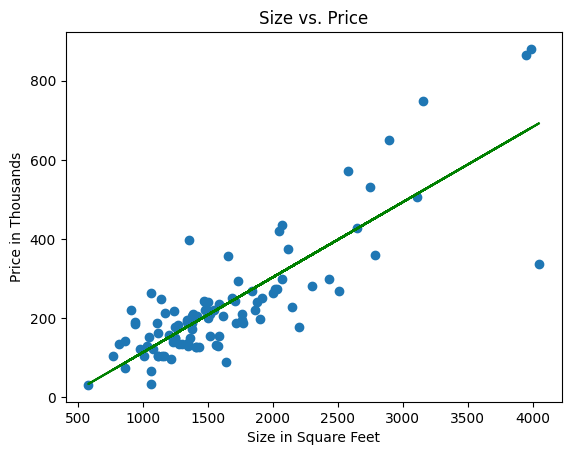

In [12]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ size', data=houses).fit()
slope = model.params['size']
intr = model.params['Intercept']
x = houses['size']
y = intr + slope * x
plt.scatter(houses['size'], houses['price'])
plt.plot(x, y, color='green')
plt.xlabel("Size in Square Feet")
plt.ylabel("Price in Thousands")
plt.title("Size vs. Price")
plt.show()


Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

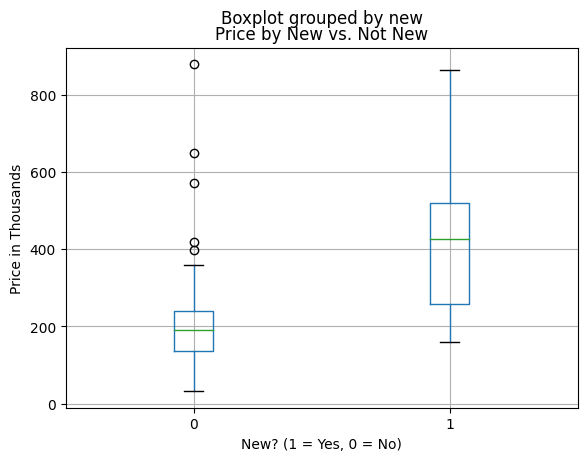

In [16]:
houses.boxplot(column='price', by='new')
plt.xlabel("New? (1 = Yes, 0 = No)")
plt.ylabel("Price in Thousands")
plt.title("Price by New vs. Not New")
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between size and price is a generally positive relationship leading to a certain extent, after which the relationship disperses into outliers. The relationship between price and whether or not a house is new is that the average price definitely goes up as a house is new, but there are also highly priced old house outliers to consider.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [14]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\\s+')

In [15]:
table = (pd.crosstab(happy['marital'], happy['happiness']))
table


happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
